Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-06-26 

CPython 3.5.1
IPython 4.2.0

matplotlib 1.5.1
numpy 1.11.0
scipy 0.17.1
mlxtend 0.4.2.dev0


In [2]:
%matplotlib inline

# Neural Network - Multilayer Perceptron

Implementation of a multilayer perceptron, a feedforward artificial neural network.

> from mlxtend.classifier import MultiLayerPerceptron

## Overview

*Although the code is fully working and can be used for common classification tasks, this implementation is not geared towards efficiency but clarity – the original code was written for demonstration purposes.*

### Basic Architecture

![](./NeuralNetMLP_files/neuralnet_mlp_1.png)  

The neurons $x_0$ and $a_0$ represent the bias units ($x_0=1$, $a_0=1$). 

The $i$th superscript denotes the $i$th layer, and the *j*th subscripts stands for the index of the respective unit. For example, $a_{1}^{(2)}$ refers to the first activation unit **after** the bias unit (i.e., 2nd activation unit) in the 2nd layer (here: the hidden layer)

  \begin{align}
    \mathbf{a^{(2)}} &= \begin{bmatrix}
           a_{0}^{(2)} \\
           a_{1}^{(2)} \\
           \vdots \\
           a_{m}^{(2)}
         \end{bmatrix}.
  \end{align}

Each layer $(l)$ in a multi-layer perceptron, a directed graph, is fully connected to the next layer $(l+1)$. We write the weight coefficient that connects the $k$th unit in the $l$th layer to the $j$th unit in layer $l+1$ as $w^{(l)}_{j, k}$.

For example, the weight coefficient that connects the units

$a_0^{(2)} \rightarrow a_1^{(3)}$

would be written as $w_{1,0}^{(2)}$.

### Activation

In the current implementation, the activations of the hidden layer(s) are computed via the logistic (sigmoid) function $\phi(z) = \frac{1}{1 + e^{-z}}.$

![](./NeuralNetMLP_files/logistic_function.png)

(For more details on the logistic function, please see [`classifier.LogisticRegression`](./LogisticRegression.md); a general overview of different activation function can be found [here](../general_concepts/activation-functions.md).)

Furthermore, the MLP uses the softmax function in the output layer, For more details on the logistic function, please see [`classifier.SoftmaxRegression`](./SoftmaxRegression.md).

### References

- D. R. G. H. R. Williams and G. Hinton. [Learning representations by back-propagating errors](http://lia.disi.unibo.it/Courses/SistInt/articoli/nnet1.pdf). Nature, pages 323–533, 1986.
- C. M. Bishop. [Neural networks for pattern recognition](https://books.google.de/books?hl=en&lr=&id=T0S0BgAAQBAJ&oi=fnd&pg=PP1&dq=Neural+networks+for+pattern+recognition&ots=jL6TqGbBld&sig=fiLrMg-RJx22cgQ7zd2CiwUqNqI&redir_esc=y#v=onepage&q=Neural%20networks%20for%20pattern%20recognition&f=false). Oxford University Press, 1995.
- T. Hastie, J. Friedman, and R. Tibshirani. [The Elements of Statistical Learning](http://statweb.stanford.edu/%7Etibs/ElemStatLearn/), Volume 2. Springer, 2009.

## Examples

### Example 1 - Classifying Iris Flowers

Load 2 features from Iris (petal length and petal width) for visualization purposes:

In [3]:
from mlxtend.data import iris_data
X, y = iris_data()
X = X[:, [0, 3]]    

# standardize training data
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

Train neural network for 3 output flower classes ('Setosa', 'Versicolor', 'Virginica'), regular gradient decent (`minibatches=1`), 30 hidden units, and no regularization.

#### Gradient Descent

Setting the `minibatches` to `1` will result in gradient descent training; please see [Gradient Descent vs. Stochastic Gradient Descent](../general_concepts/gradient-optimization.md) for details.

In [4]:
from mlxtend.classifier import MultiLayerPerceptron as MLP

nn1 = MLP(hidden_layers=[50], 
          l2=0.00, 
          l1=0.0, 
          epochs=150, 
          eta=0.05, 
          momentum=0.1,
          decrease_const=0.0,
          minibatches=1, 
          random_seed=1,
          print_progress=3)

nn1 = nn1.fit(X_std, y)

Iteration: 150/150 | Cost 0.06 | Elapsed: 0:00:00 | ETA: 0:00:00

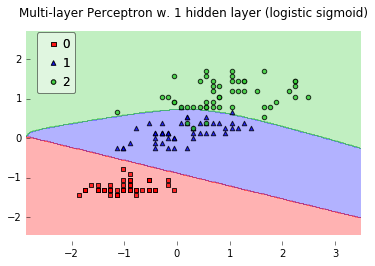

In [5]:
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt

fig = plot_decision_regions(X=X_std, y=y, clf=nn1, legend=2)
plt.title('Multi-layer Perceptron w. 1 hidden layer (logistic sigmoid)')
plt.show()

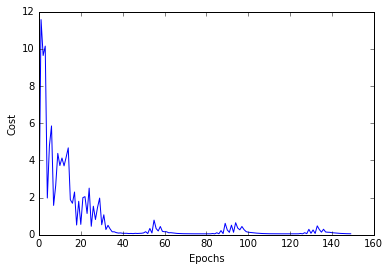

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [7]:
print('Accuracy: %.2f%%' % (100 * nn1.score(X_std, y)))

Accuracy: 96.67%


#### Stochastic Gradient Descent

Setting `minibatches` to `n_samples` will result in stochastic gradient descent training; please see [Gradient Descent vs. Stochastic Gradient Descent](../general_concepts/gradient-optimization.md) for details.

Iteration: 5/5 | Cost 0.11 | Elapsed: 00:00:00 | ETA: 00:00:00

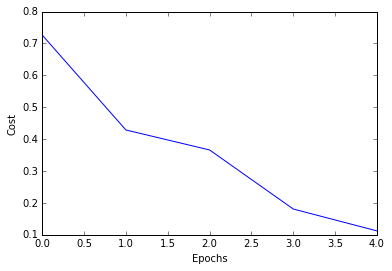

In [8]:
nn2 = MLP(hidden_layers=[50], 
          l2=0.00, 
          l1=0.0, 
          epochs=5, 
          eta=0.005, 
          momentum=0.1,
          decrease_const=0.0,
          minibatches=len(y), 
          random_seed=1,
          print_progress=3)

nn2.fit(X_std, y)

plt.plot(range(len(nn2.cost_)), nn2.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

Continue the training for 25 epochs...

In [9]:
nn2.epochs = 25
nn2 = nn2.fit(X_std, y)

Iteration: 25/25 | Cost 0.07 | Elapsed: 0:00:00 | ETA: 0:00:00

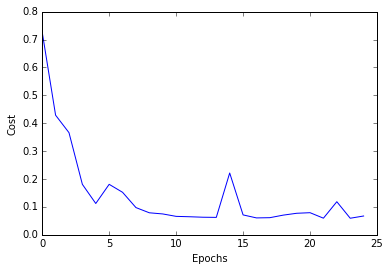

In [10]:
plt.plot(range(len(nn2.cost_)), nn2.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

### Example 2 - Classifying Handwritten Digits from a 10% MNIST Subset

Load a **5000-sample subset** of the [MNIST dataset](http://rasbt.github.io/mlxtend/docs/data/mnist/) (please see [`data.loadlocal_mnist`](../data/loadlocal_mnist.md) if you want to download and read in the complete MNIST dataset).


In [11]:
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = mnist_data()
X, y = shuffle_arrays_unison((X, y), random_seed=1)
X_train, y_train = X[:500], y[:500]
X_test, y_test = X[500:], y[500:]

Visualize a sample from the MNIST dataset to check if it was loaded correctly:

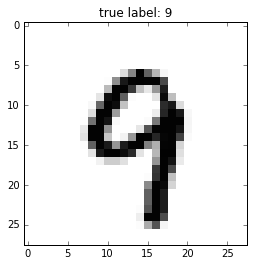

In [12]:
import matplotlib.pyplot as plt

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
    
plot_digit(X, y, 3500)    

Standardize pixel values:

In [13]:
import numpy as np
from mlxtend.preprocessing import standardize

X_train_std, params = standardize(X_train, 
                                  columns=range(X_train.shape[1]), 
                                  return_params=True)

X_test_std = standardize(X_test,
                         columns=range(X_test.shape[1]),
                         params=params)

Initialize the neural network to recognize the 10 different digits (0-10) using 300 epochs and mini-batch learning.

In [14]:
nn1 = MLP(hidden_layers=[150], 
          l2=0.00, 
          l1=0.0, 
          epochs=100, 
          eta=0.005, 
          momentum=0.0,
          decrease_const=0.0,
          minibatches=100, 
          random_seed=1,
          print_progress=3)

Learn the features while printing the progress to get an idea about how long it may take.

Iteration: 100/100 | Cost 0.01 | Elapsed: 0:00:22 | ETA: 0:00:00

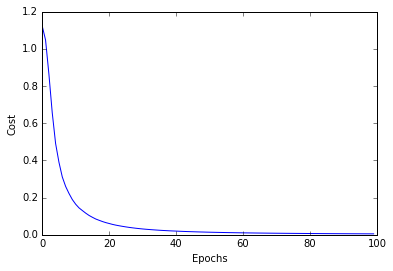

In [15]:
import matplotlib.pyplot as plt

nn1.fit(X_train_std, y_train)

plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [16]:
print('Train Accuracy: %.2f%%' % (100 * nn1.score(X_train_std, y_train)))
print('Test Accuracy: %.2f%%' % (100 * nn1.score(X_test_std, y_test)))

Train Accuracy: 100.00%
Test Accuracy: 84.62%


**Please note** that this neural network has been trained on only 10% of the MNIST data for technical demonstration purposes, hence, the lousy predictive performance.

## API

In [1]:
with open('../../api_modules/mlxtend.classifier/NeuralNetMLP.md', 'r') as f:
    print(f.read())

## NeuralNetMLP

*NeuralNetMLP(n_output, n_features, n_hidden=30, l1=0.0, l2=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle_init=True, shuffle_epoch=True, minibatches=1, zero_init_weight=False, random_seed=None, print_progress=0)*

Feedforward neural network / Multi-layer perceptron classifier.

**Parameters**

- `n_output` : int

    Number of output units, should be equal to the
    number of unique class labels.

- `n_features` : int

    Number of features (dimensions) in the target dataset.
    Should be equal to the number of columns in the X array.

- `n_hidden` : int (default: 30)

    Number of hidden units.

- `l1` : float (default: 0.0)

    Lambda value for L1-regularization.
    No regularization if l1=0.0 (default)

- `l2` : float (default: 0.0)

    Lambda value for L2-regularization.
    No regularization if l2=0.0 (default)

- `epochs` : int (default: 500)

    Number of passes over the training set.

- `eta` : float (default: 0.001)

    Learning r